In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *
import seaborn as sns
sns.set_style('whitegrid')

# Introduction to Autoregressive models

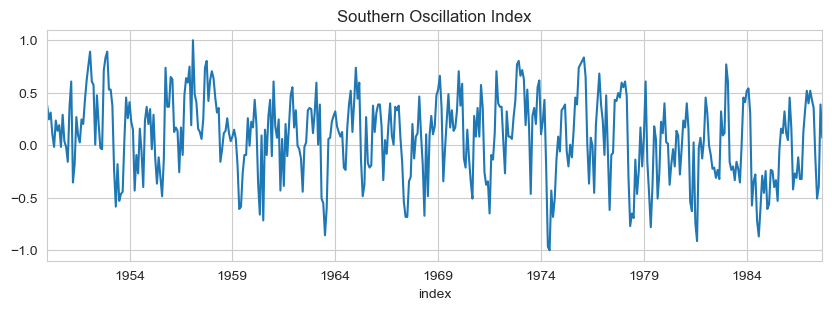

In [9]:
fig, ax = plt.subplots(figsize=(10,3))
soi.plot(title="Southern Oscillation Index",ax=ax, legend=False)
plt.show()

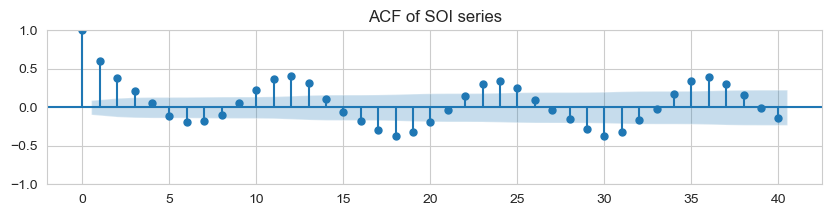

In [8]:
fig, ax = plt.subplots(figsize=(10,2))
sm.graphics.tsa.plot_acf(soi.value, lags=40, ax = ax, title="ACF of SOI series")
plt.show()

### The ACF of SOI series shows relatively positive values at lags 1,2,12,24 and 36 and large negative values at 18, 30, and 42.  This suggests that we may be able to predict the series using lagged values. 



Blue area in the ACF plot depicts the 95% confidence interval and is an indicator of the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

## Definition: An autoregressive model of order p , (AR(p)) is of the form

$$x_t=\phi_1x_{t-1}+\phi_2 x_{t-2}+...+\phi_p x_{t-p}+w_t$$

## where $x_t$ is stationary, $w_t$ is white noise and $\phi_i$ are parameters with $\phi_p\neq 0$.

 Note that we take the mean $\mu$ of $x_t$ is to be zero. If the mean is not zero then we can replace $x_t$ by $x_t-\mu$ and obtain the series $x_t=\alpha+\phi_1x_{t-1}+\phi_2 x_{t-2}+...+\phi_p x_{t-p}+w_t$ in which mean is zero, where $\alpha=\mu(1-\phi_1-\phi_2-...-\phi_p)$.

## Example: AR(1) model: $x_t=\phi x_{t-1}+w_t$ where $|\phi|<1$ and $Var(x_t)<\infty$ for all $t$. Then AR(1) model reduces to $x_t=\sum_{j=0}^\infty \phi^j w_{t-j}$ and so the mean $E(x_t)=0$.  

Also the autocovariance function $\gamma(h)=\frac{\sigma_w^2 \phi^h}{1-\phi^2}$ for $h\geq 0$ and so 
the correlation function $\rho(h)=\frac{\gamma(h)}{\gamma(0)}=\phi^h$ and $\rho(h)=\phi \rho(h-1)$ for $h=1,2,..$.
So autocorrelation is never zero for any $h\geq 0$.


Let's generate two samples from AR(1) with $\phi=0.9$ and $\phi=-0.9$ with $\sigma_w=1$ (Gaussian noise).

Note that when $\phi=0.9$ (positive), observations at contiguous time points tends to be colse each other resulting a smooth series and when negative contiguous time points are negative correlated but two points apart points are positively correlated resulting a choppy series. 

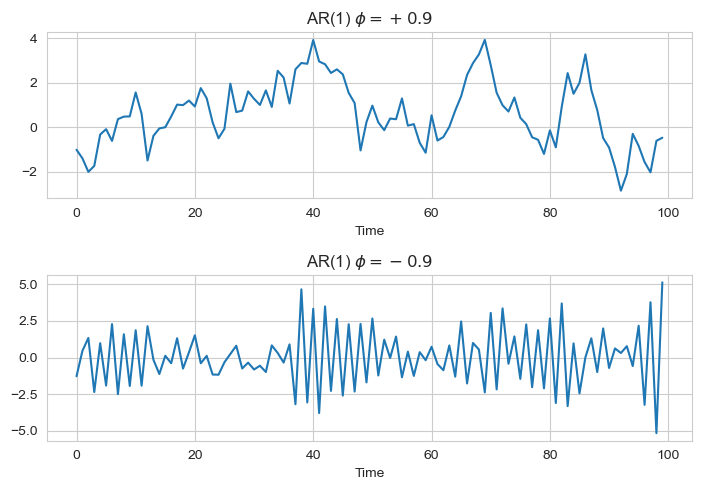

In [16]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
series1 = sm.tsa.arma_generate_sample(ar=[1, -.9], ma=[1, 0], nsample=100)
axes[0].plot(series1)
#ar = [1,-0.9] are coefficients of autoreggresive terms and ma is for coefficients of white noise
axes[0].set_xlabel("Time")
axes[0].set_title(r"AR(1) $\phi = +0.9$")
series2 = sm.tsa.arma_generate_sample(ar=[1, .9], ma=[1, 0], nsample=100)
axes[1].plot(series2)
axes[1].set_xlabel("Time")
axes[1].set_title(r"AR(1) $\phi = -0.9$")
fig.tight_layout()
plt.show()

[]

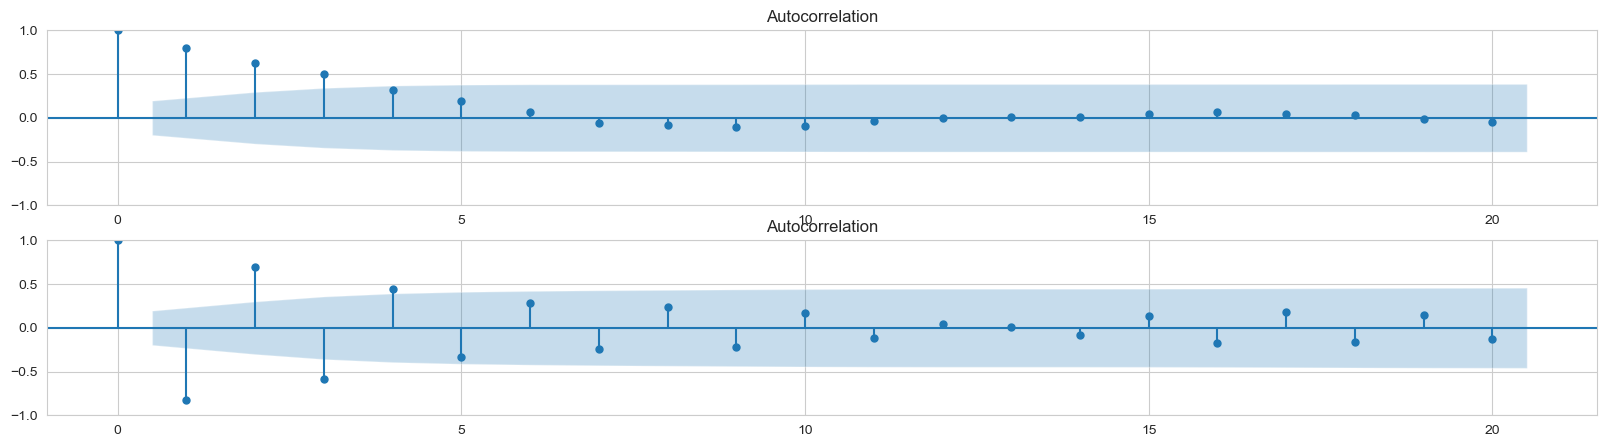

In [17]:
fig, ax = plt.subplots(nrows = 2, figsize=(20, 5))
sm.graphics.tsa.plot_acf(series1, lags=20, ax = ax[0])
sm.graphics.tsa.plot_acf(series2, lags=20, ax = ax[1])
plt.plot()

# Introduction to Moving Average models

 n moving average models we assume that a series can be defined as a linear combination of white noise. 

## Definition: The moving average model of order $q$, (MA(q)) is defined to be
$$x_t=w_t+\theta_1 w_{t-1}+\theta_2 w_{t-2}+...+\theta_q w_{t-q}$$ where $w_t$ is white noise and $\theta_i$ are parameters with $\theta_q\neq 0$.
Note that the moving average process is stationary for any values of parameters.

### Example: MA(1) process: $x_t=w_t+\theta w_{t-1}$.
Note that $E(x_t)=0$. 

 \begin{equation}
\gamma(h)=
   \left\{\begin{array}{lr}
       (1+\theta^2)\sigma_w^2; & h=0 \\
       \theta \sigma_w^2; & h=1\\
       0 ; & h>1
    \end{array}\right.
 \end{equation}

and 

 \begin{equation}
\rho(h)=
   \left\{\begin{array}{lr}
       \frac{\theta}{(1+\theta^2)}; & h=1 \\
       0 ; & h>1
    \end{array}\right.
 \end{equation}

Example below considers two cases $\theta=0.9$ and $\theta=-0.9$.

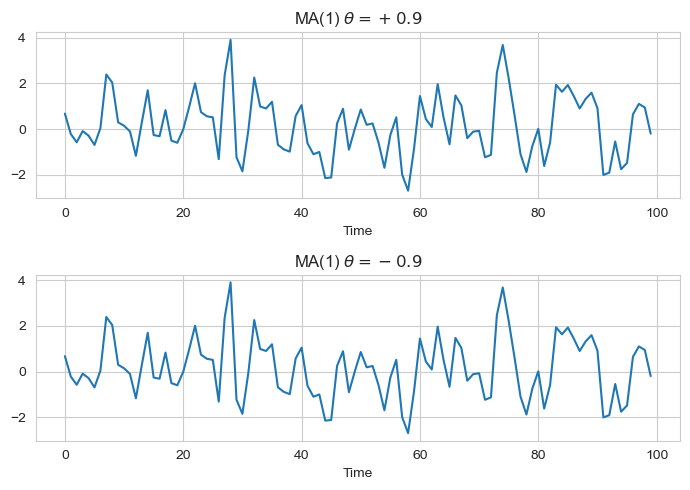

In [19]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
series1 = sm.tsa.arma_generate_sample(ar=[1, 0], ma=[1, .9], nsample=100)
axes[0].plot(series1)
axes[0].set_xlabel("Time")
axes[0].set_title(r"MA(1) $\theta = +0.9$")
series2 = sm.tsa.arma_generate_sample(ar=[1, 0], ma=[1, -.9], nsample=100)
axes[1].plot(series1)
axes[1].set_xlabel("Time")
axes[1].set_title(r"MA(1) $\theta = -0.9$")
fig.tight_layout()
plt.show()

[]

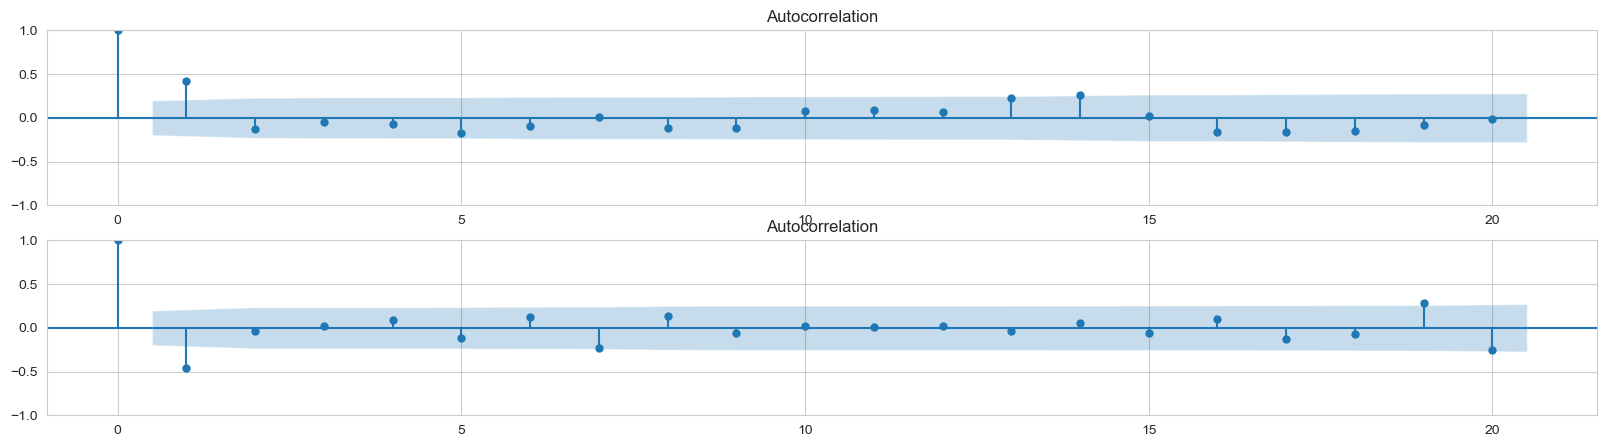

In [20]:
fig, ax = plt.subplots(nrows = 2, figsize=(20, 5))
sm.graphics.tsa.plot_acf(series1, lags=20, ax = ax[0])
sm.graphics.tsa.plot_acf(series2, lags=20, ax = ax[1])
plt.plot()

# Introduction to Autoregressive Moving Average models

### This is a combination of an AR and MA models.

## Definition: A time series $x_t$ is ARMA(p,q) if it is stationary and 
$$x_t=\phi_1 x_{t-1}+...+\phi_p x_{t-p}+w_t+\theta_1 w_{t-1}+....+\theta_q w_{t-q}$$
## with $\phi_p\neq 0$, $\theta_q\neq 0$ and $\sigma_w>0$.

Here also we take the mean $\mu$ to be zero. If $\mu\neq 0$ then we convert the series to a zero mean series using the technique introduced in the AR model section. 

### Example: $x_t=0.5x_{t-1}-0.5w_{t-1}+w_t\implies$ ARMA(1,1)
In this example $x_t$ is white noise ($x_t=w_t$ is a solution to the equation). As this example suggests we may model white noise with ARMA(1,1) and find that the parameters are significant. 

Having this common factor 0.5 in this example makes the series to be white noise. Thus we usually define ARMA models such that they do not contain common factors, hence not reducible. If an ARMA process is invertible then it is not reducible.



In [27]:
np.random.seed(8675309) # Jenny, I got your number
x = np.random.normal(loc=5, size=150) # Jenerate iid N(5, 1)s

mod = sm.tsa.arima.ARIMA(x, order=(1, 0, 1), enforce_invertibility=False, enforce_stationarity=False)
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -201.911
Date:                Mon, 13 Mar 2023   AIC                            411.822
Time:                        02:53:54   BIC                            423.811
Sample:                             0   HQIC                           416.694
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0186      0.065     77.373      0.000       4.891       5.146
ar.L1          0.3526      0.444      0.795      0.427      -0.517       1.223
ma.L1         -0.4956      0.420     -1.181      0.2